# Monte Carlo example

In [1]:
# Add PyTwoWay to system path, do not run this
import sys
sys.path.append('../../..')

In [2]:
# Import the PyTwoWay package
# (Make sure you have installed it using pip install pytwoway)
import pytwoway as tw
import bipartitepandas as bpd
import numpy as np

## First, check out parameter options

In [3]:
print('----- Simulation -----')
bpd.sim_params().describe_all()
print('----- FE -----')
tw.fe_params().describe_all()
print('----- CRE -----')
tw.cre_params().describe_all()
print('----- Clustering -----')
bpd.cluster_params().describe_all()
print('----- Cleaning -----')
bpd.clean_params().describe_all()

----- Simulation -----
KEY: 'n_workers'
CURRENT VALUE: 10000
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=10000) Number of workers.
        
KEY: 'n_time'
CURRENT VALUE: 5
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=5) Time length of panel.
        
KEY: 'firm_size'
CURRENT VALUE: 50
VALID VALUES: one of type (<class 'float'>, <class 'int'>)
CONSTRAINTS: '> 0'
DESCRIPTION: 
            (default=50) Average observations per firm per time period.
        
KEY: 'nk'
CURRENT VALUE: 10
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=10) Number of firm types.
        
KEY: 'nl'
CURRENT VALUE: 5
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=5) Number of worker types.
        
KEY: 'alpha_sig'
CURRENT VALUE: 1
VALID VALUES: one of type (<class 'float'>, <class 'int'>)
CONSTRAINTS: '>= 0'
DESCRIPTION:

## Second, set parameter choices

In [4]:
# Set parameters
nl = 5 # Number of worker types
nk = 10 # Number of firm types
sim_params = bpd.sim_params({
    'n_workers': 1000,
    'nl': nl, 'nk': nk,
    'firm_size': 5,
    'alpha_sig': 2, 'w_sig': 2,
    'c_sort': 1.5, 'c_netw': 1.5,
    'p_move': 0.1
})
fe_params = tw.fe_params({'he': True, 'lev_threshold_obs': 1, 'weighted': True})
cre_params = tw.cre_params()
kmeans = bpd.grouping.KMeans(n_clusters=nk)
cluster_params = bpd.cluster_params({'grouping': kmeans})
clean_params = bpd.clean_params({'verbose': False})

## Third, run the Monte Carlo simulation using the parameter choices

In [5]:
# Create the TwoWayMonteCarlo object
twmc = tw.MonteCarlo(
    sim_params=sim_params,
    fe_params=fe_params,
    cre_params=cre_params,
    cluster_params=cluster_params,
    clean_params=clean_params,
    collapse=True, # If True, run estimators on data collapsed at the worker-firm spell level
    move_to_worker=False, # If True, each move is treated as a new worker
    log=False # If True, will create log file(s)
)
# Run the Monte Carlo estimation
twmc.monte_carlo(
    N=500, # Number of simulations
    ncore=4, # Number of cores to use
    rng=np.random.default_rng(1234) # NumPy random number generator. This overrides the random number generators for simulating, FE, and CRE.
)

100%|█████████████████████████████████████████| 500/500 [06:52<00:00,  1.21it/s]


## Finally, plot histograms of parameter estimates (histograms show the difference from the truth)

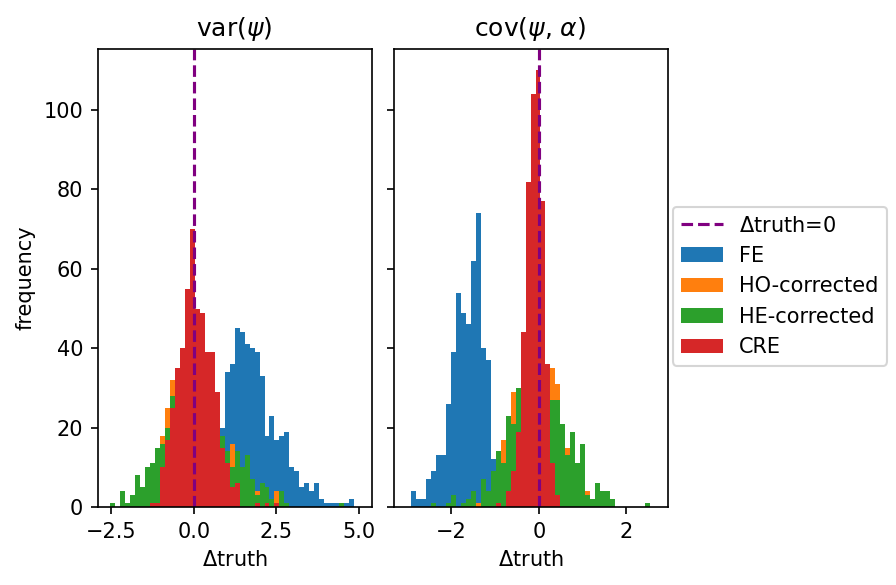

In [6]:
twmc.hist()